## This notebook does the exercises in Part 1 of the QuantEcon Tutorials for Julia

In [1]:
x=1
y=2
z=x+y
println("x+y=$z")

x+y=3



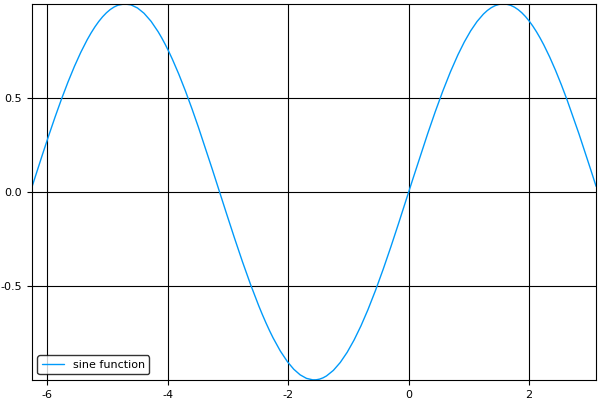

In [2]:
using Plots
plot(sin, -2pi,pi,label="sine function") 

In [3]:
?repmat

search: repmat



```
repmat(A, n, m)
```

Construct a matrix by repeating the given matrix `n` times in dimension 1 and `m` times in dimension 2.


Practice writing in markdown.

In [4]:
using QuantEcon: tauchen
tauchen(4,0.9,1.0)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
[0.945853 0.0541468 2.92863e-10 0.0; 0.00580845 0.974718 0.0194737 1.43534e-11; 1.43534e-11 0.0194737 0.974718 0.00580845; 2.08117e-27 2.92863e-10 0.0541468 0.945853]


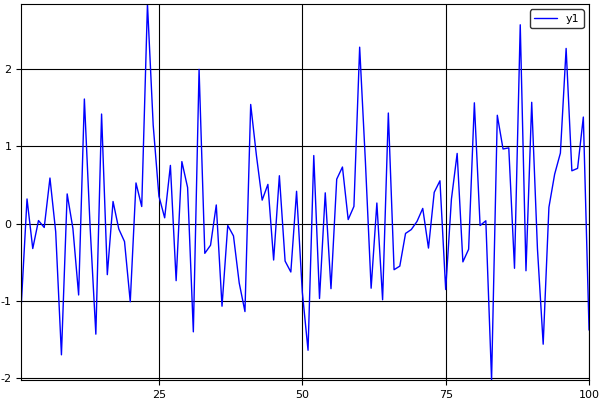

In [5]:
using Plots # make all names exported by Plots available
ts_length=100
epsilon_values=randn(ts_length)
plot(epsilon_values,color="blue")

In [6]:
typeof(epsilon_values)

Array{Float64,1}

Exercise 1: Write your own version of n! in Julia, using a for loop

In [7]:
function factorial2(n)
    out=1
    for i=1:n 
        out=out*i
    end
    return out
end

fact5=factorial2(4)

24

Exercise 2: Using only rand() write a function binomial_rv s.t. binomial_rv(n,p) generates one draw of Y where Y is a binomial r.v.

In [8]:
function binomial_rv(n::Int,p::Float64)
    # p is the probability that we get a success
    out=0 # start off at zero successes
    U=rand(n) # draw all the random numbers at once, outside of the loop
    for ii=1:n
        if U[ii]<p #success
            out=out+1
        end
    end
    return out
end

binomial_rv (generic function with 1 method)

In [9]:
b=binomial_rv(10,0.5)

5

Exercise 4:  

Write a program that prints one realization of the following random device:

Flip an unbiased coin 10 times
If 3 consecutive heads occur one or more times within this sequence, pay one dollar
If not, pay nothing
Once again use only rand() as your random number generator

In [10]:
function random_coin()
    out=0 # initial amount to be paid
    # do the random generation outside of the for loop
    outcome=rand(10)
    coin_vec=zeros(10)
    # heads is getting <0.5
    for i=1:10
        if outcome[i]<0.5
            coin_vec[i]=1
        end
        
    end
    
    for i=2:9
        if coin_vec[i]==1 && coin_vec[i-1]==1 && coin_vec[i+1]==1
            out=1
            break
        end
    end
    return out
end

random_coin (generic function with 1 method)

In [11]:
x=random_coin()

1

Exercise 5
Simulate and plot an AR(1) with persistence =0.9 and standard normal errors for T=200 periods


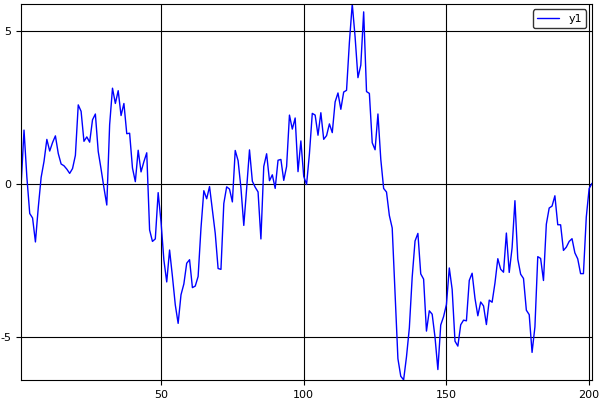

In [12]:
alpha=0.9
T=200

function AR1_simul(T::Int, alpha::Float64)
    x=zeros(T+1)
    for ii=1:T
        x[ii+1]=alpha*x[ii]+randn()
    end
    return x
end

x=AR1_simul(200,0.9)
plot(x, color="blue")

Exercise 6: Plot three simulated time series, one for each of the cases α=0α=0, α=0.8α=0.8 and α=0.98α=0.98

In particular, you should produce (modulo randomness) a figure that looks as follows

In [13]:
alphavec=[0.0,0.8,0.98]
T=200
T_vec=linspace(1,200,200)
using PyPlot
function AR1_simul(T::Int, alpha)
    x1=zeros(T+1)
    x2=zeros(T+1)
    x3=zeros(T+1)
    for ii=1:T
        x1[ii+1]=alpha[1]*x1[ii]+randn()
        x2[ii+1]=alpha[2]*x2[ii]+randn()
        x3[ii+1]=alpha[3]*x3[ii]+randn()
    end
    return x1,x2,x3
end

x1,x2,x3=AR1_simul(T,alphavec)


([0.0,0.808243,-0.246559,0.000551395,1.31663,-2.14614,-0.262593,0.923158,0.545279,-0.14259  …  -3.95202,0.570095,0.0936291,2.43539,-0.955614,-0.669294,0.205839,-0.409637,-1.95473,0.00327161],[0.0,-1.18649,-1.30994,-0.423742,-1.67096,-0.985646,-0.550864,0.200413,1.57437,-0.678777  …  -0.778738,-0.970479,-2.28222,-2.1214,-1.26787,-1.16453,-0.462041,1.1467,1.37839,2.64947],[0.0,-0.273145,0.444841,1.57323,2.95602,4.14031,2.9404,1.38277,1.06258,1.33924  …  0.51677,1.22551,1.85741,0.585436,0.00842499,0.254212,0.66257,0.200852,1.02435,1.2249])


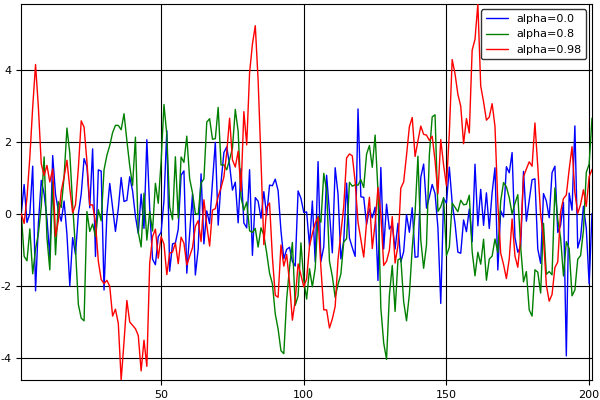

In [14]:

#plot 1st
plot(x1,label="alpha=0.0", color="blue")
# plot 2nd
plot!(x2,label="alpha=0.8", color="green" )
plot!(x3,label="alpha=0.98", color="red" )


Julia Essentials: Exercises
Exercise 1: Part 1: Given two numeric arrays or tuples x_vals and y_vals of equal length, compute their inner product using zip()

Part 2: Using a comprehension, count the number of even numbers in 0,...,99

Hint: x % 2 returns 0 if x is even, 1 otherwise
Part 3: Using a comprehension, take pairs = ((2, 5), (4, 2), (9, 8), (12, 10)) and count the number of pairs (a, b) such that both a and b are even

In [15]:
function inner_prod(x_vals,y_vals)
    out=0.0
    for (x,y) in zip(x_vals,y_vals)
        out=out+x*y
    end
    return out
end

x_vals=[1,2,0,0]
y_vals=[1,1,0,0]

inprod=inner_prod(x_vals,y_vals)

3.0

In [16]:
# Part 2
x=linspace(0,99,100)
count_even=x%2
num_even=sum(count_even)

50.0

In [17]:
# Part 3:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
function evenpairs(listpairs)
    num_even=0
    for pair in listpairs
        if pair[1]%2==0 && pair[2]%2==0
            num_even=num_even+1
        end
    end
    return num_even
end

evenpairs (generic function with 1 method)

In [18]:
num_even1=evenpairs(pairs)

2

Consider the polynomial
p(x)=a0+a1x+a2x2+⋯anxn=∑i=0naixi
p(x)=a0+a1x+a2x2+⋯anxn=∑i=0naixi
Using enumerate() in your loop, write a function p such that p(x, coeff) computes the value in (1) given a point x and an array of coefficients coeff

In [19]:
function poly(x,coeff)
   out=sum(a*x^(i-1) for (i,a) in enumerate(coeff))
   return out
end

poly (generic function with 1 method)

In [20]:
y=poly(0.5,[0,0,1])

0.25

### Section 3: Julia Arrays
Consider the stochastic difference equation:  
$$ X_{t+1}=AX_t+b+\Sigma W_{t+1} $$  
Here:  
* $X_t,b$ and $X_{t+1}$ are n x 1  
* A is n x n 
* $\Sigma$ is n x k 
* $W_t$ is k x 1 and $\{W_t\}$ is iid with zero mean and covariance matrix equal to the identity  
Let $S_t$ be the n x n covariance matrix of $X_t$.  
$\{S_t\}$ obeys:  
$$ S_{t+1}=AS_t A' + \Sigma \Sigma' $$

When all the eigenvales of $A$ lie within the unit circle, the sequence $\{S_t\}$ converges to a unique limit $S$. 

Write a function that solves for the limit $S$ by iterating given $A$ and $\Sigma$.


In [21]:
function discrLyapunov(A,Sig,maxiter=500)
    n=length(A[1,:]) # size of the matrix S 
    S=zeros(n,n) # initial guess for S
    for i=1:maxiter
       S_up=A*S*transpose(A)+Sig*transpose(Sig)
       S=S_up
    end
    return S
end

discrLyapunov (generic function with 2 methods)

In [22]:
A=[0.8 -0.2;-0.1 0.7]
Sig=[0.5 0.4; 0.4 0.6]
S=discrLyapunov(A,Sig)

2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

Practice with creating new types.  
Create a type for AR1

In [23]:
type AR1
    a
    b
    sigma
    phi
end
using Distributions
m=AR1(0.9,1,1,Beta(5,5))

AR1(0.9,1,1,Distributions.Beta{Float64}(α=5.0, β=5.0))

In [24]:
# access fields of the type by doing .
m.a

0.9

Can also specify exactly what types the elements of the AR1 are.

In [25]:
type AR1_explicit
    a::Real
    b::Real
    sigma::Real
    phi::Distribution
end

Exercise 1: Write a function that takes as arguments  
* an instance m of AR1
* an integer n
* a real number x0
and returns a time series of simulations for the AR1 process starting with the initial condition x0

In [26]:
function simulate(m::AR1, n::Integer, x0::Real)
   xpath=Array{Float64}(n) # initialize the array
   #xpath=zeros(n) 
   xpath[1]=x0
   # draw shocks
   Wvec=rand(m.phi,n)
    for i=1:n-1
        xpath[i+1]=m.a*xpath[i]+m.b+m.sigma*Wvec[i]
    end
    return xpath
end

simulate (generic function with 1 method)

In [27]:
m1=AR1(0.5,0.3,0.5,Beta(0.5,0.5))
xt=simulate(m1,200,0.1)

200-element Array{Float64,1}:
 0.1     
 0.479786
 0.717909
 0.96925 
 0.840967
 1.18397 
 1.37975 
 0.994376
 0.806914
 0.772029
 1.08043 
 1.32989 
 0.976444
 ⋮       
 0.937936
 1.12419 
 0.899356
 0.751091
 0.675883
 0.841824
 0.856626
 1.10374 
 1.10061 
 1.11891 
 0.942214
 0.8241  

Exercise 2:  
Write a universal function f such that:  
* f(k) returns a chi-squared random variable with k degrees of freedom when k is an integer  
* f(k_vec) returns a vector where f(k_vec)[i] is chi-squared with k_vec[i] degrees of freedom  
Hint: If we take k independent standard normals, square them   all and sum we get a chi-squared with k degrees of freedom


In [28]:
function f(k::Integer)
    out=sum(randn(k).^2)
    return out
end

function f(kvec::Array{Int64,1})
    n=length(kvec)
    chivec=Array{Float64,1}(n)
    for i=1:n 
        chivec[i]=sum(randn(kvec[i]).^2)
    end
    return chivec
end

f (generic function with 2 methods)

In [29]:
y=f([5,3,2])

3-element Array{Float64,1}:
 2.53786 
 0.90467 
 0.467055